## Week 2 Homework Submission


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## EDA and Data Prep
- Load the data
- Plot median-house-value, does it have a long tail?

In [1]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [2]:
!wget $data 

--2023-09-24 18:23:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2023-09-24 18:23:49 (45.8 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [13]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


/Users/waleed/Library/Caches/pypoetry/virtualenvs/machine-learning-zoomcamp-eZ02cD9b-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/waleed/Library/Caches/pypoetry/virtualenvs/machine-learning-zoomcamp-eZ02cD9b-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

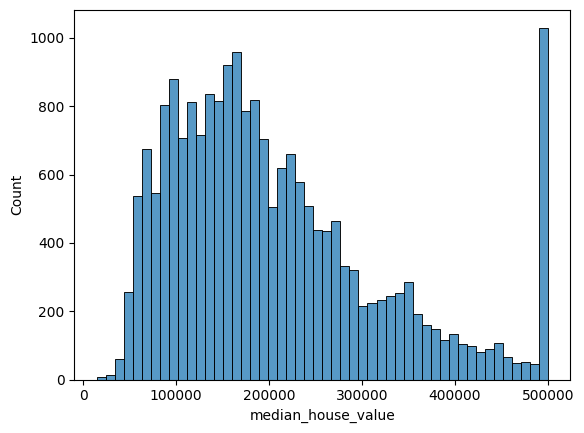

In [11]:
sns.histplot(df.median_house_value, bins=50)

- The median_house_value doesn't appear to have a super long tail, but it does have a weird s pike at $500,000 for a house price

### Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

/Users/waleed/Library/Caches/pypoetry/virtualenvs/machine-learning-zoomcamp-eZ02cD9b-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/waleed/Library/Caches/pypoetry/virtualenvs/machine-learning-zoomcamp-eZ02cD9b-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(       latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
 701       37.64    -121.97                32.0       1283.0           194.0   
 830       37.61    -121.99                 9.0       3666.0           711.0   
 859       37.57    -121.97                21.0       4342.0           783.0   
 860       37.58    -121.96                15.0       3575.0           597.0   
 861       37.58    -121.98                20.0       4126.0          1031.0   
 ...         ...        ...                 ...          ...             ...   
 20635     39.48    -121.09                25.0       1665.0           374.0   
 20636     39.49    -121.21                18.0        697.0           150.0   
 20637     39.43    -121.22                17.0       2254.0           485.0   
 20638     39.43    -121.32                18.0       1860.0           409.0   
 20639     39.37    -121.24                16.0       2785.0           616.0   
 
        population  households  median

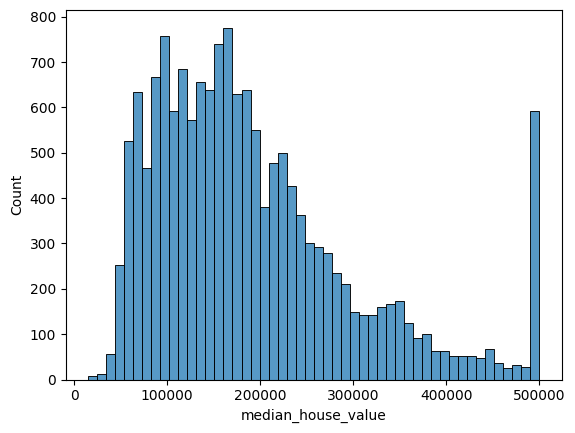

In [36]:
# filter for <1H OCEAN or INLAND
newdf = df[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]
# keep only the columns listed
newdf = newdf[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
newdf, sns.histplot(newdf['median_house_value'], bins=50)

### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms` <--
* `population`
* `households`

In [35]:
missing = newdf.isnull().sum()
print(f"the feature with missing values is {[column for column in missing[missing>0].index]}")

the feature with missing values is ['total_bedrooms']


### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195 <--
- 1295

In [39]:
print(f"The median for 'population' is {newdf['population'].median()}")

The median for 'population' is 1195.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good <--

In [41]:
# set the seed to 42
np.random.seed(42)
# split your data
n = len(newdf)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_train, n_val, n_test

(15687, 9413, 3137, 3137)

In [49]:
# create an index with n values
idx = np.arange(n)
# shuffle the index
np.random.shuffle(idx)

# create dataframes for train, validation, test with randomly selected values
df_train = newdf.iloc[idx[:n_train]]
df_val = newdf.iloc[idx[n_train:n_train+n_val]]
df_test = newdf.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [72]:
# create the training model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def prepare_X(df, base, fill):
    df_num = df[base]
    if fill=="zeros":
        df_num = df_num.fillna(0)
    elif fill=="mean":
        df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [58]:
# reset indices on the dataframes:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# assign y variables, take the log
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [59]:
df_train.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [60]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [87]:
# IMPLEMENT FILLING NA WITH 0
X_train = prepare_X(df_train, base, fill="zeros")
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

X_val = prepare_X(df_val, base, fill="zeros")
y_pred = w0 + X_val.dot(w)

rmse_zeros = round(rmse(y_val, y_pred),2)
print(f"The rmse of y_val vs y_pred is {rmse_zeros}")

The rmse of y_val vs y_pred is 0.33


In [88]:
# IMPLEMENT FILLING NA WITH 0
X_train = prepare_X(df_train, base, fill="mean")
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

X_val = prepare_X(df_val, base, fill="mean")
y_pred = w0 + X_val.dot(w)

rmse_mean = round(rmse(y_val, y_pred),2)
print(f"The rmse of y_val vs y_pred is {rmse_mean}")

The rmse of y_val vs y_pred is 0.33


In [89]:
print(f"The RMSE values of zeros vs the mean are the same!")

The RMSE values of zeros vs the mean are the same!


/Users/waleed/Library/Caches/pypoetry/virtualenvs/machine-learning-zoomcamp-eZ02cD9b-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/waleed/Library/Caches/pypoetry/virtualenvs/machine-learning-zoomcamp-eZ02cD9b-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/waleed/Library/Caches/pypoetry/virtualenvs/machine-learning-zoomcamp-eZ02cD9b-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

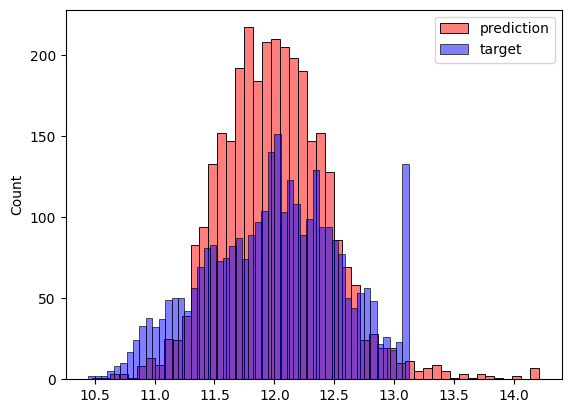

In [90]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0 <--
- 0.000001
- 0.001
- 0.0001

In [91]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [93]:
# IMPLEMENT FILLING NA WITH 0
X_train = prepare_X(df_train, base, fill="zeros")
X_val = prepare_X(df_val, base, fill="zeros")
r_vals = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in r_vals:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_train.dot(w) 
    y_pred = w0 + X_val.dot(w)
    rmse_zeros = round(rmse(y_val, y_pred),2)
    print(f"The rmse of y_val vs y_pred for r={r} is {rmse_zeros}")

The rmse of y_val vs y_pred for r=0 is 0.33
The rmse of y_val vs y_pred for r=1e-06 is 0.33
The rmse of y_val vs y_pred for r=0.0001 is 0.33
The rmse of y_val vs y_pred for r=0.001 is 0.33
The rmse of y_val vs y_pred for r=0.01 is 0.33
The rmse of y_val vs y_pred for r=0.1 is 0.33
The rmse of y_val vs y_pred for r=1 is 0.34
The rmse of y_val vs y_pred for r=5 is 0.34
The rmse of y_val vs y_pred for r=10 is 0.34


In [94]:
print("The r value that gives the best RMSE is 0")

The r value that gives the best RMSE is 0


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005 <--
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [101]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

std_score = []
for seed in seeds:    
    np.random.seed(seed)
    
    # split your data
    n = len(newdf)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # create an index with n values
    idx = np.arange(n)
    # shuffle the index
    np.random.shuffle(idx)
    
    # create dataframes for train, validation, test with randomly selected values
    df_train = newdf.iloc[idx[:n_train]]
    df_val = newdf.iloc[idx[n_train:n_train+n_val]]
    df_test = newdf.iloc[idx[n_train+n_val:]]

    # reset indices on the dataframes:
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # assign y variables, take the log
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    X_train = prepare_X(df_train, base, fill="zeros")
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, base, fill="zeros")
    y_pred = w0 + X_val.dot(w)
    
    score = round(rmse(y_val, y_pred),2)
    print(f"The rmse of y_val vs y_pred for seed = {seed} is {score}")
    std_score.append(score)

print(std_score)
print(round(np.std(std_score),3))

The rmse of y_val vs y_pred for seed = 0 is 0.34
The rmse of y_val vs y_pred for seed = 1 is 0.34
The rmse of y_val vs y_pred for seed = 2 is 0.34
The rmse of y_val vs y_pred for seed = 3 is 0.33
The rmse of y_val vs y_pred for seed = 4 is 0.34
The rmse of y_val vs y_pred for seed = 5 is 0.34
The rmse of y_val vs y_pred for seed = 6 is 0.34
The rmse of y_val vs y_pred for seed = 7 is 0.35
The rmse of y_val vs y_pred for seed = 8 is 0.35
The rmse of y_val vs y_pred for seed = 9 is 0.33
[0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.33]
0.006


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33 <--
- 0.43

In [104]:
np.random.seed(9)

# split your data
n = len(newdf)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# create an index with n values
idx = np.arange(n)
# shuffle the index
np.random.shuffle(idx)

# create dataframes for train, validation, test with randomly selected values
df_train = newdf.iloc[idx[:n_train]]
df_val = newdf.iloc[idx[n_train:n_train+n_val]]
df_test = newdf.iloc[idx[n_train+n_val:]]

# reset indices on the dataframes:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train_val = pd.concat([df_train, df_val], ignore_index=True)

len(df_train), len(df_val), len(df_test), len(df_train_val)

(9413, 3137, 3137, 12550)

In [106]:
# assign y variables, take the log
y_train_val = np.log1p(df_train_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

X_train_val = prepare_X(df_train_val, base, fill="zeros")
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X(df_test, base, fill="zeros")
y_pred = w0 + X_test.dot(w)

score = round(rmse(y_test, y_pred),2)
print(f"The rmse of y_val vs y_pred is {score}")

The rmse of y_val vs y_pred is 0.33
